<font size= 6, face='new times' color='purpleblue'>***Objectifs - Etapes***


<b><font size= 5, face='new times'><li> **Analyse exploratoire des données ;**

<font size= 5, face='new times'> <li>Gestion des valeurs manquantes ;

<font size= 5, face='new times'><li> Gestion des valeurs aberrantes (outliers) ;

<font size= 5, face='new times'> <li>Autres étapes possibles de prétraitement des données ;

<font size= 5, face='new times'><li> Division de l'ensemble des données (données d'entraînement, de validation et de test) ;

<font size= 5, face='new times'> <li>Construction de plusieurs modèles à partir de différents algorithmes de Machine Learning ;

<font size= 5, face='new times'> <li>Comparaison des performances des algorithmes ;

<font size= 5, face='new times'> <li>Sélection et Evaluation du modèle final.




<font size= 6, face='new times' color='purpleblue'>***Importation des librairies et des données***

In [ ]:
# Librairies et fonctions

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Supression des variables répétées & secondaires
df = df.drop(['alive', 'who', 'embarked', 'class', 'deck'], axis = 1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True


Voici une explication des principales variables du dataset Titanic :

<u>***Survived (Survécu)***</u> : Cette variable binaire indique si un passager a survécu (1) ou non (0) au naufrage du Titanic.

<u>***Pclass (Classe)***</u> : Représente la classe du billet du passager, avec trois catégories possibles (1 : la première classe, 2 : la deuxième classe, 3 : la troisième classe).

<u>***Name (Nom)***</u> : Le nom du passager.

<u>***Sex (Sexe)***</u> : Le sexe du passager, soit "male" pour homme, "female" pour femme.

<u>***Age (Âge)***</u> : L'âge du passager. Cette variable peut contenir des valeurs manquantes.

<u>***SibSp (Frères et sœurs / Conjoints à bord)***</u> : Le nombre de frères, sœurs ou conjoints du passager à bord du Titanic.

<u>***Parch (Parents / Enfants à bord)***</u> : Le nombre de parents ou d'enfants du passager à bord du Titanic.

<u>***Ticket (Billet)***</u> : Le numéro du billet du passager.

<u>***Fare (Tarif)***</u> : Le montant payé par le passager pour son billet.

<u>***Cabin (Cabine)***</u> : Le numéro de cabine du passager. Cette variable peut contenir des valeurs manquantes.

<u>***Embarked (Port d'embarquement)***</u> : Le port d'embarquement du passager (C pour Cherbourg, Q pour Queenstown, S pour Southampton).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


<font size= 6, face='new times' color='purpleblue'>***Data Visualization***

<Axes: xlabel='survived', ylabel='count'>

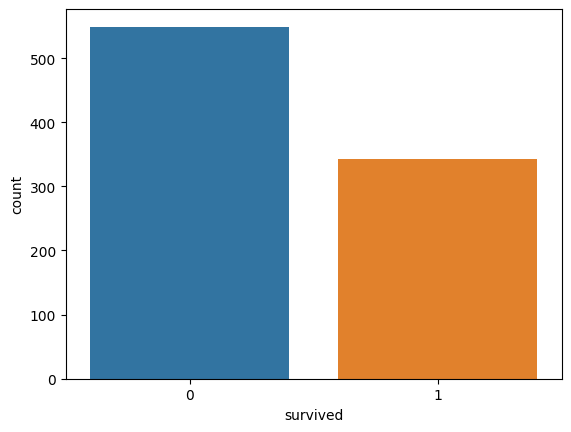

In [ ]:
sns.countplot(x = 'survived', data=df)

In [ ]:
df['survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

<Axes: xlabel='pclass', ylabel='count'>

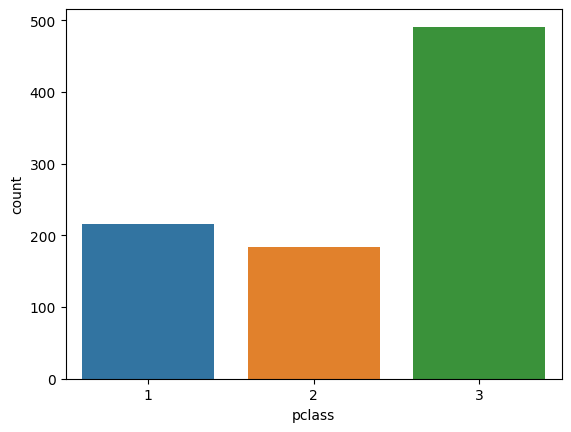

In [ ]:
sns.countplot(x='pclass', data=df)

<Axes: xlabel='sex', ylabel='count'>

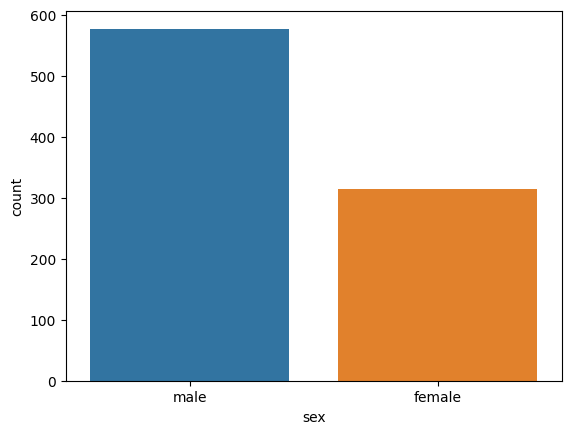

In [ ]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='sibsp', ylabel='count'>

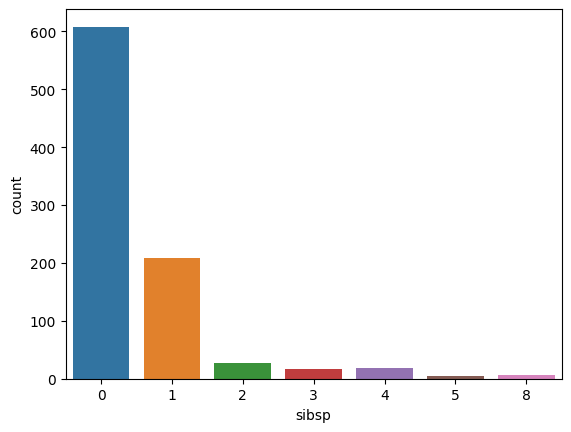

In [ ]:
sns.countplot(x='sibsp', data=df)

<Axes: xlabel='parch', ylabel='count'>

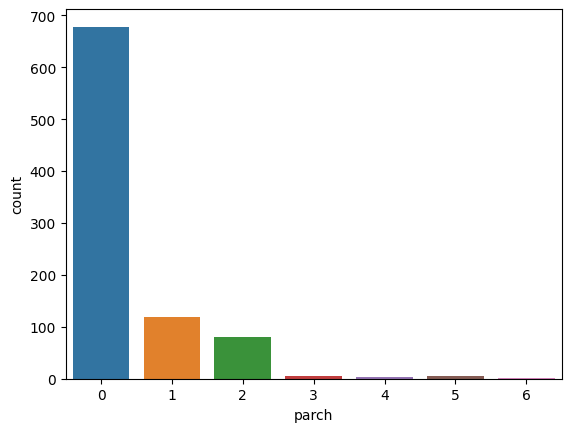

In [ ]:
sns.countplot(x='parch', data=df)

<Axes: ylabel='fare'>

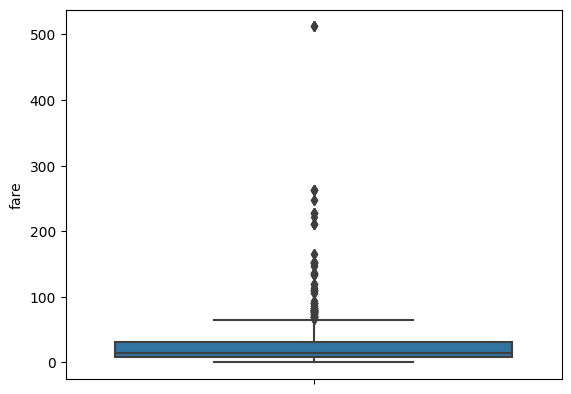

In [ ]:
sns.boxplot(y='fare', data=df)

##*il existe beaucoup des valeurs abberantes (Outliers)*

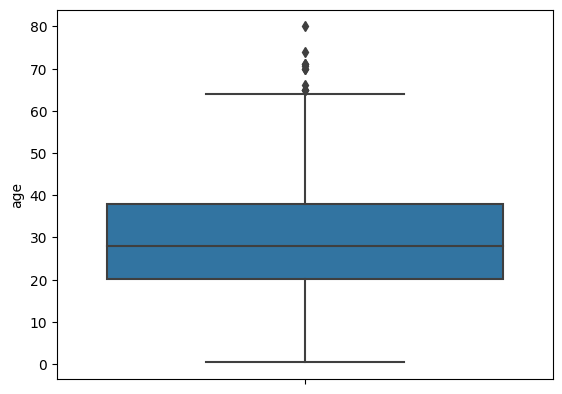

In [ ]:
sns.boxplot(y = 'age', data = df);

<ipython-input-14-51131e65a86c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=False, bins=20);


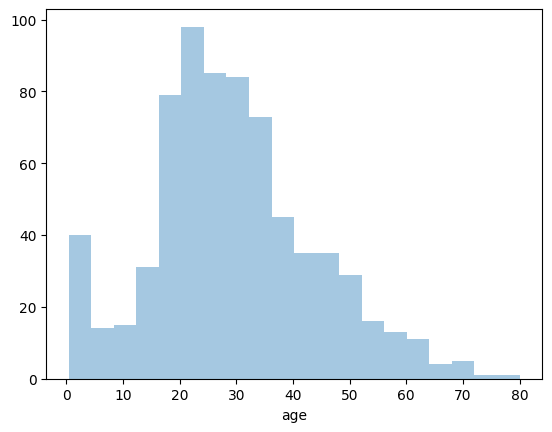

In [ ]:
sns.distplot(df['age'], kde=False, bins=20);

<ipython-input-15-fc0887e28bf7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'], kde=False, bins=20);


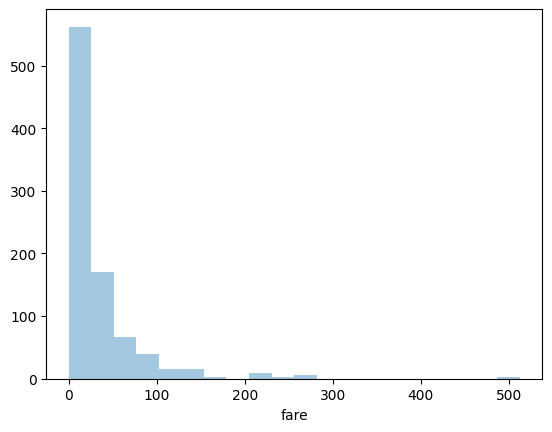

In [ ]:
sns.distplot(df['fare'], kde=False, bins=20)

<Axes: xlabel='adult_male', ylabel='count'>

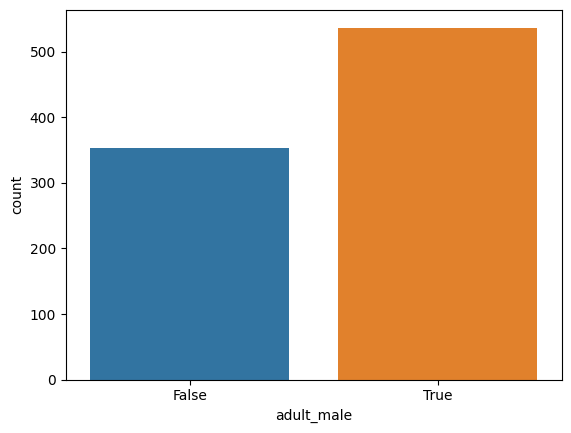

In [ ]:
sns.countplot(x='adult_male', data=df)

In [ ]:
pd.crosstab(df['sex'], df['adult_male'])

adult_male,False,True
sex,,
female,314,0
male,40,537


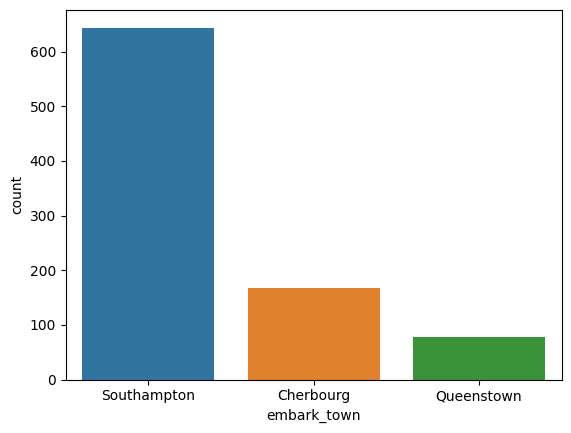

In [ ]:
sns.countplot(x = 'embark_town', data=df);

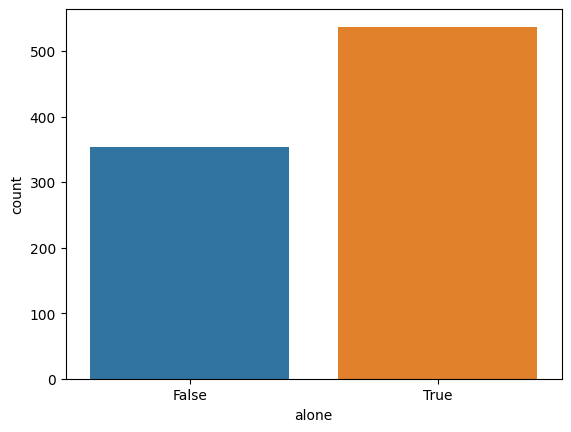

In [ ]:
sns.countplot(x = 'alone', data=df)

<font size= 6, face='new times' color='purpleblue'>***Relation entre les variables***

<Axes: xlabel='survived', ylabel='age'>

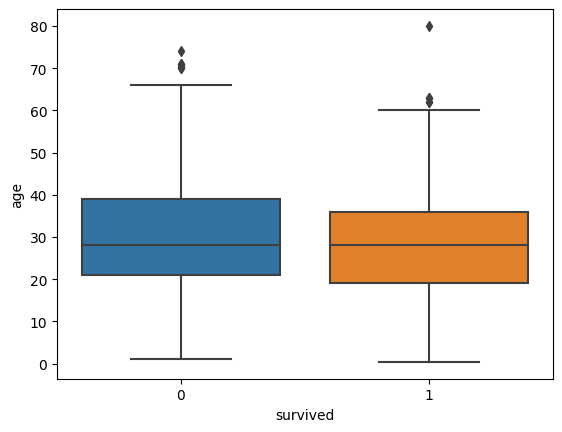

In [ ]:
# Relation entre âge et variable cible
sns.boxplot(x = 'survived', y = 'age', data=df)

<Axes: xlabel='survived', ylabel='age'>

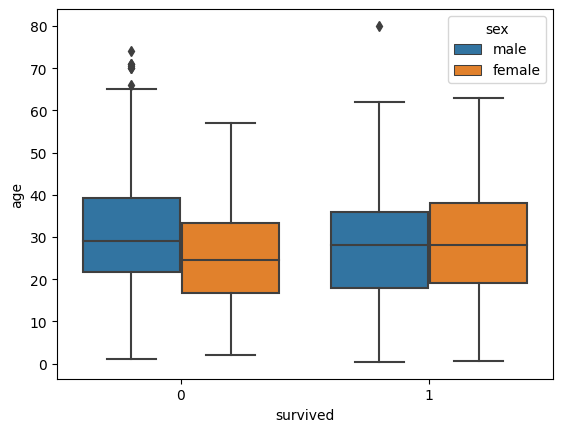

In [ ]:
sns.boxplot(x = 'survived', y = 'age', hue = 'sex', data=df)

<Axes: xlabel='survived', ylabel='fare'>

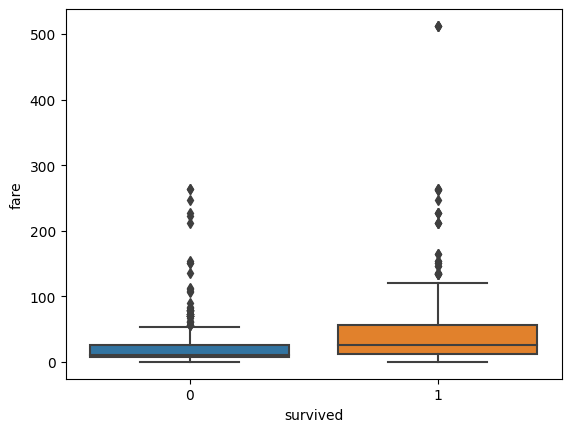

In [ ]:
sns.boxplot(x = 'survived', y = 'fare', data = df)

<Axes: xlabel='survived', ylabel='fare'>

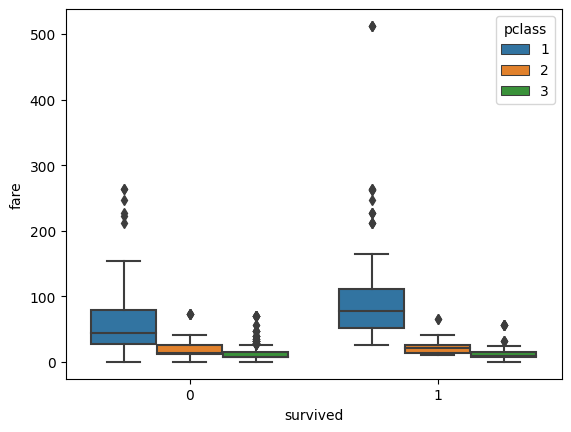

In [ ]:
sns.boxplot(x = 'survived', y = 'fare', hue = 'pclass', data = df)

<Axes: xlabel='survived', ylabel='fare'>

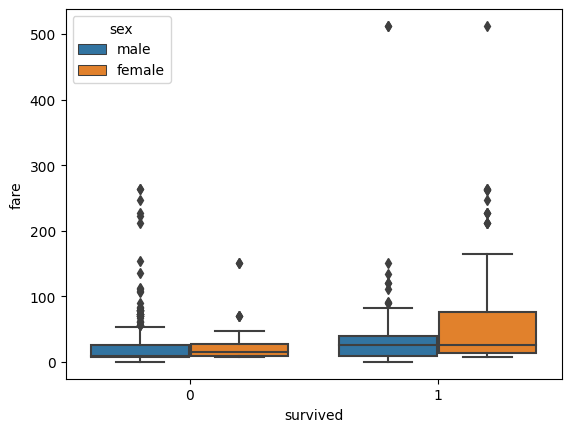

In [ ]:
sns.boxplot(x = 'survived', y = 'fare', hue = 'sex', data = df)

<font size= 6, face='new times' color='purpleblue'>***Data Cleaning***

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# il y a 99% des valeurs de la var "fare" qui sont < a 249.00622
df['fare'].quantile(0.99)

249.00622000000035

In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [ ]:
df.shape

(891, 10)

In [ ]:
df.fillna(value={'age':df['age'].median()}, inplace=True)

In [ ]:
#l'ecart-type de la nouvelle variable Age
df['age'].std()

13.019696550973201

In [ ]:
df['embark_town'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

##*pour les variables categorielles remplacer les valeurs manquantes par le mode de la variable cad la modalité de grande fréquence*

In [ ]:
df.fillna(value={'embark_town' :'Southampton'}, inplace=True)

In [ ]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

<font size= 6, face='new times' color='purpleblue'>***Preparation de données***

<font size= 5, face='new times' color='yellow'>***Traitement des valeurs aberrantes***

#<b>val aberrante == V < Q1- 1.5 **IQR ou V > Q3+1.5* *IQR
#IQR = Q3 - Q1



In [34]:
def finding_outliers(data, variable_name):
  iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
  lower = data[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data[variable_name].quantile(0.75) + 1.5 * iqr
  return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

<font size= 5, face='new times' color='orangered'>***for  _Fare _ variable***




In [35]:
finding_outliers(df, 'fare').sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
336,0,1,male,29.0,1,0,66.6000,True,Southampton,False
151,1,1,female,22.0,1,0,66.6000,False,Southampton,False
369,1,1,female,24.0,0,0,69.3000,False,Cherbourg,True
641,1,1,female,24.0,0,0,69.3000,False,Cherbourg,True
846,0,3,male,28.0,8,2,69.5500,True,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
27,0,1,male,19.0,3,2,263.0000,True,Southampton,False
341,1,1,female,24.0,3,2,263.0000,False,Southampton,False
679,1,1,male,36.0,0,1,512.3292,True,Cherbourg,False
737,1,1,male,35.0,0,0,512.3292,True,Cherbourg,True


In [36]:
iqr = df['fare'].quantile(0.75) - df['fare'].quantile(0.25)
iqr

23.0896

In [37]:
df['fare'].quantile(0.75) + 1.5 * iqr

65.6344

In [38]:
df.loc[finding_outliers(df, 'fare').index, 'fare'] = df['fare'].quantile(0.75) + 1.5 * iqr

<Axes: ylabel='fare'>

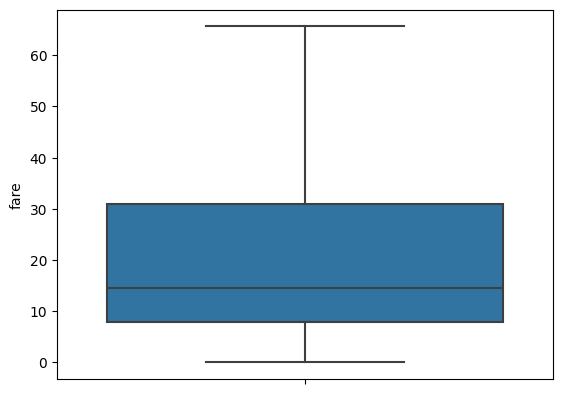

In [39]:
sns.boxplot(y='fare', data=df)

<font size= 5, face='new times' color='orangered'>***for Age variable***




In [40]:
finding_outliers(df, 'age').sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
803,1,3,male,0.42,0,1,8.5167,False,Cherbourg,False
755,1,2,male,0.67,1,1,14.5000,False,Southampton,False
469,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
644,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
831,1,2,male,0.83,1,1,18.7500,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,True,Queenstown,True
96,0,1,male,71.00,0,0,34.6542,True,Cherbourg,True
493,0,1,male,71.00,0,0,49.5042,True,Cherbourg,True
851,0,3,male,74.00,0,0,7.7750,True,Southampton,True


In [41]:
lower=df['age'].quantile(0.25) - 1.5*(df['age'].quantile(0.75)-df['age'].quantile(0.25))

In [42]:
upper=df['age'].quantile(0.75) + 1.5*(df['age'].quantile(0.75)-df['age'].quantile(0.25))

In [43]:
df.loc[df['age']< lower, 'age']=lower
df.loc[df['age']> upper, 'age']=upper

<Axes: ylabel='age'>

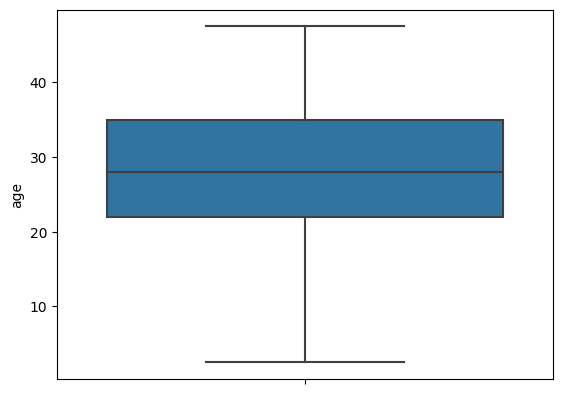

In [44]:
sns.boxplot(y ='age', data=df)

In [45]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,65.6344,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True


<font size= 5, face='new times' color='Yellow'>***Transformation des variables categoriques en variables Binaires***




In [46]:
df['sex']=df['sex'].replace({'male':1,'female':0})
#df['sex']=df['sex'].astype(int)

In [47]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['alone']=l.fit_transform(df['alone'])
df['adult_male']=l.fit_transform(df['adult_male'])

In [48]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1


In [50]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [51]:
embark_dummies=pd.get_dummies(df['embark_town'],drop_first=True)
embark_dummies

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [52]:
df = pd.concat([df, embark_dummies], axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1,0,1


In [53]:
df.drop('embark_town', axis=1, inplace=True)
#del df['embark_town']

In [54]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1



<font size= 5, face='new times' color='yellow'>***Features Engineering***</font>

<font size= 5, face='new times' >***C'est la création des nouvelles vars a partir des vars existantes***



In [55]:
df['family'] = df['sibsp'] + df['parch']
df.drop(['sibsp', 'parch'], axis=1, inplace=True)
df.head(3)

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,0,1,1
1,1,1,0,38.0,65.6344,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,0,1,0



<font size= 5, face='new times' color='yellow'>***Division des données***</font>


### Division des données 60% train, 20% validation, 20% test

In [56]:
from sklearn.model_selection import train_test_split
seed = 111
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = seed, stratify=y_test)

In [57]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [58]:
y_train.value_counts(normalize=True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [59]:
y_val.value_counts(normalize=True)

0    0.617978
1    0.382022
Name: survived, dtype: float64

In [60]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: survived, dtype: float64


<font size= 6, face='new times' color='yellow'>***Normalisation***</font>

<font size= 5, face='new times' color='skyblue'>***sur-échantillonnage (upsampling)***</font>




In [71]:
# Méthode de sur-échantillonnage (upsampling)
from sklearn.utils import resample

X2 = X_train
X2['survived'] = y_train.values
X2.head()

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
150,2,1,47.5,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
151,1,0,22.0,65.6344,0,0,0,1,1,1
149,2,1,42.0,13.0000,1,1,0,1,0,0


In [73]:
X2.shape

(534, 10)

In [72]:
X_train

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
150,2,1,47.5,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
151,1,0,22.0,65.6344,0,0,0,1,1,1
149,2,1,42.0,13.0000,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
445,1,1,4.0,65.6344,0,0,0,1,2,1
361,2,1,29.0,27.7208,1,0,0,0,1,0
411,3,1,28.0,6.8583,1,1,1,0,0,0
469,3,0,2.5,19.2583,0,0,0,0,3,1


In [74]:
minority = X2[X2.survived == 1]
majority = X2[X2.survived == 0]

minority_upsampled = resample(minority, replace=True, n_samples = len(majority))

minority_upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
416,2,0,34.0,32.5000,0,0,0,1,2,1
248,1,1,37.0,52.5542,1,0,0,1,2,1
230,1,0,35.0,65.6344,0,0,0,1,1,1
754,2,0,47.5,65.0000,0,0,0,1,3,1
61,1,0,38.0,65.6344,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
535,2,0,7.0,26.2500,0,0,0,1,2,1
869,3,1,4.0,11.1333,0,0,0,1,2,1
457,1,0,28.0,51.8625,0,0,0,1,1,1
829,1,0,47.5,65.6344,0,1,0,1,0,1


In [76]:
majority.shape

(329, 10)

In [75]:
upsampled = pd.concat([majority, minority_upsampled])
upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,47.5,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
149,2,1,42.0,13.0000,1,1,0,1,0,0
249,2,1,47.5,26.0000,1,0,0,1,1,0
464,3,1,28.0,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
535,2,0,7.0,26.2500,0,0,0,1,2,1
869,3,1,4.0,11.1333,0,0,0,1,2,1
457,1,0,28.0,51.8625,0,0,0,1,1,1
829,1,0,47.5,65.6344,0,1,0,1,0,1


In [77]:
upsampled['survived'].value_counts(normalize = True)

0    0.5
1    0.5
Name: survived, dtype: float64

<Axes: xlabel='survived', ylabel='count'>

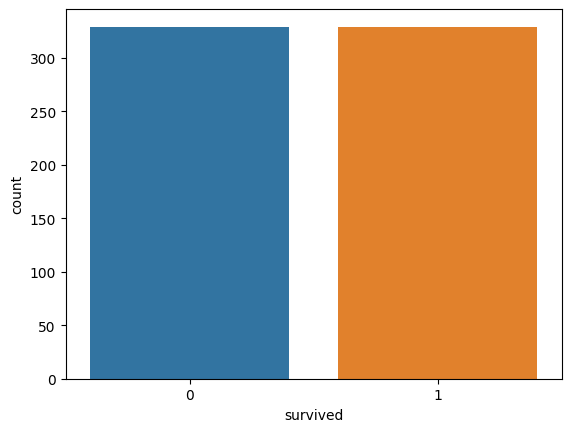

In [78]:
sns.countplot(x = 'survived', data=upsampled)

In [79]:
X_train_up = upsampled.drop('survived', axis=1)
y_train_up = upsampled['survived']

<font size= 5, face='new times' color='skyblue'>***sous-échantillonnage (upsampling)***</font>

In [81]:
# Méthode de sous-échantillonnage
majority_downsampled = resample(majority, replace=False, n_samples = len(minority))
majority_downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
236,2,1,44.0,26.0000,1,0,0,1,1,0
694,1,1,47.5,26.5500,1,1,0,1,0,0
42,3,1,28.0,7.8958,1,1,0,0,0,0
51,3,1,21.0,7.8000,1,1,0,1,0,0
768,3,1,28.0,24.1500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
77,3,1,28.0,8.0500,1,1,0,1,0,0
94,3,1,47.5,7.2500,1,1,0,1,0,0
482,3,1,47.5,8.0500,1,1,0,1,0,0
422,3,1,29.0,7.8750,1,1,0,1,0,0


In [82]:
downsampled = pd.concat([minority, majority_downsampled])
downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
151,1,0,22.0,65.6344,0,0,0,1,1,1
788,3,1,2.5,20.5750,0,0,0,1,3,1
609,1,0,40.0,65.6344,0,1,0,1,0,1
697,3,0,28.0,7.7333,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
77,3,1,28.0,8.0500,1,1,0,1,0,0
94,3,1,47.5,7.2500,1,1,0,1,0,0
482,3,1,47.5,8.0500,1,1,0,1,0,0
422,3,1,29.0,7.8750,1,1,0,1,0,0


In [83]:
X_train_down = downsampled.drop(['survived'], axis=1)
y_train_down = downsampled['survived']

<font size= 6, face='new times' color='purpleblue'>***Modélisation***

In [84]:
# Sélection de variables importantes (ACP, ...)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state = seed)
rf.fit(X_train_up, y_train_up)
accuracy_score(y_val, rf.predict(X_val))

0.7584269662921348

In [86]:
print(X_train_up.columns)
print(rf.feature_importances_) # les beta(i) (les coeff du modèle)

Index(['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family'],
      dtype='object')
[0.07514026 0.11160748 0.22306828 0.24245147 0.2311488  0.01212156
 0.00778623 0.01884486 0.07783107]


In [87]:
vars_imp = pd.Series(rf.feature_importances_, index = X_train_up.columns).sort_values(ascending=False)
vars_imp

fare           0.242451
adult_male     0.231149
age            0.223068
sex            0.111607
family         0.077831
pclass         0.075140
Southampton    0.018845
alone          0.012122
Queenstown     0.007786
dtype: float64

In [91]:
import matplotlib.pyplot as plt

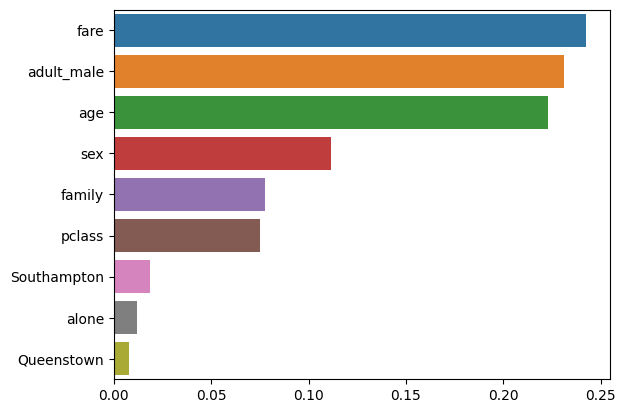

In [92]:
sns.barplot(x=vars_imp, y=vars_imp.index)
plt.show()

In [93]:
vars_non_imp = ['Queenstown']
X_train_up = X_train_up.drop(vars_non_imp, axis=1)
X_val = X_val.drop(vars_non_imp, axis=1)
X_test = X_test.drop(vars_non_imp, axis=1)

<font size= 6, face='new times' color='YELLOW'>***Régression logistique***</font>

In [94]:
# Régression logistique

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state= seed, max_iter=500)
lr_hyp = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

lr_cv = GridSearchCV(lr, lr_hyp, cv = 5)
lr_cv.fit(X_train_up, y_train_up)

print(lr_cv.best_score_)
print(lr_cv.best_estimator_)

0.822264631043257
LogisticRegression(C=1, max_iter=500, random_state=111)


<font size= 6, face='new times' color='YELLOW'>***Foret Aléatoire***</font>

In [95]:
 # Forêt aléatoire

RF = RandomForestClassifier(random_state=seed)

RF_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200], 'max_depth':[None, 2, 5, 10, 15, 20]}

RF_cv = GridSearchCV(RF, RF_hyp, cv = 5)
RF_cv.fit(X_train_up, y_train_up)

print(RF_cv.best_score_)
print(RF_cv.best_estimator_)

0.8952232246125377
RandomForestClassifier(max_depth=10, n_estimators=20, random_state=111)


<font size= 6, face='new times' color='YELLOW'>***SVM***</font>

In [96]:
# SVM

from sklearn.svm import SVC

sv = SVC(random_state = seed)

sv_hyp = {'C':[0.1, 1, 10], 'kernel':['linear', 'rbf']}

svm_cv = GridSearchCV(sv, sv_hyp, cv = 5)
svm_cv.fit(X_train_up, y_train_up)

print(svm_cv.best_score_)
print(svm_cv.best_estimator_)

0.8193037242655563
SVC(C=10, random_state=111)


<font size= 6, face='new times' color='YELLOW'>***Bagging Classifier***</font>

In [97]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(random_state=seed)

bc_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200]}

bc_cv = GridSearchCV(bc, bc_hyp, cv = 5)
bc_cv.fit(X_train_up, y_train_up)

print(bc_cv.best_score_)
print(bc_cv.best_estimator_)

0.876914179967615
BaggingClassifier(random_state=111)


<font size= 6, face='new times' color='purpleblue'>***Evaluation des performances et choix du modèle***

In [98]:
# Evaluation des performances et choix du modèle

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  score = accuracy_score(y_val, pred)
  print('Score global du modèle :', round(score, 3))

In [99]:
models = [lr_cv.best_estimator_, RF_cv.best_estimator_,
          svm_cv.best_estimator_, bc_cv.best_estimator_]

for model in models:
  print('Modèle ' + str(model))
  model_evaluation(model, X_val, y_val)
  print('-'*90)

Modèle LogisticRegression(C=1, max_iter=500, random_state=111)
Score global du modèle : 0.747
------------------------------------------------------------------------------------------
Modèle RandomForestClassifier(max_depth=10, n_estimators=20, random_state=111)
Score global du modèle : 0.747
------------------------------------------------------------------------------------------
Modèle SVC(C=10, random_state=111)
Score global du modèle : 0.747
------------------------------------------------------------------------------------------
Modèle BaggingClassifier(random_state=111)
Score global du modèle : 0.758
------------------------------------------------------------------------------------------


<font size= 6, face='new times'
color='purpleblue'>***Performance du meilleur modèle sur les données de test***

In [100]:
accuracy_score(y_test, RF_cv.best_estimator_.predict(X_test))

0.7932960893854749

<font size= 4, face='new times' color='pink'> <b><u>***Random Forest***</b></u></font> *est le meilleur modèle.*